In [1]:
# Import the required packages

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import pymc3 as pm
import theano.tensor as tt

# Load io, models and utilities from python files
from dataio import load_data, preprocess_data, split_data
from model import Model
from util import save_model_trace, load_model_trace
from viz import plot_polynomial_regressions

# Serialization
import pickle

# Data Preprocessing

In [2]:
df_howell1 = load_data()

# Standardize the age column
df_howell1 = preprocess_data(df_howell1)

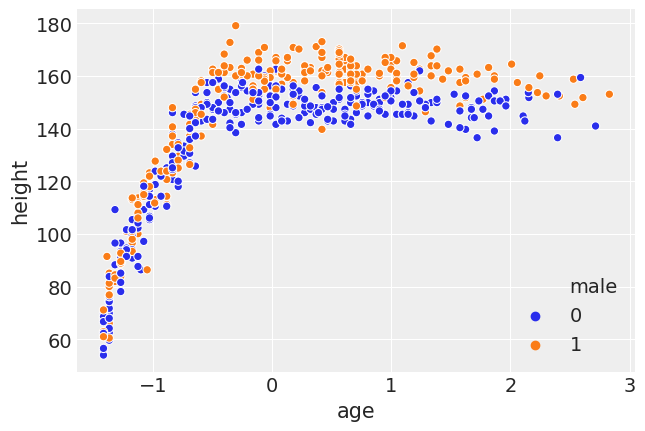

In [3]:
fig,ax = plt.subplots()
ax = sns.scatterplot(x="age", y="height", hue="male", data=df_howell1)

Age column is standardize as evident from the range of x-axis in the figure above.

# Split the data into train and test

Splitting the full data into half-train and half-test. (The ratio of 0.5 is higher that typically done).

In [4]:
df_howell1_train, df_howell1_test = split_data(df_howell1)

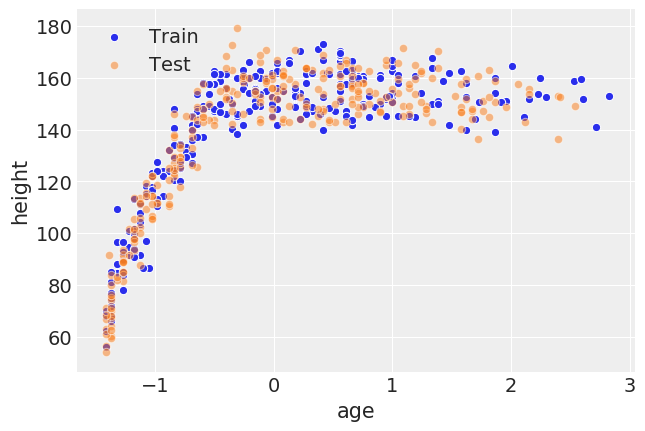

In [5]:
fig,ax = plt.subplots()
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="age", y="height", data=df_howell1_train, label='Train',alpha=1,palette="Set2",)
sns.scatterplot(x="age", y="height", data=df_howell1_test, label='Test',alpha=0.5,palette="Set2",)

# Modeling: Probabilistic Machine Learning

We will fit a set of polynomials to the training data plotted above using the probabiistic programming package [PyMC3](https://docs.pymc.io/)

We will fit the following polynomial models with degree p in PyMC3:

$
\begin{equation} \label{eq1}
\begin{split}
\cal{M}_p: h_i &\approx \text{Normal}(\mu_i, \sigma) \\
 \mu_i &= \alpha + \beta_1 x_i + \beta_2 x_i^2 ..... + \beta_p x_i^p
\end{split}
\end{equation}
$ 

Where $h_i$ is the height and $x_i$ is the age of the individual.

Priors for the parameters: </br>

$
\begin{equation} \label{eq2}
\begin{split}
a &\approx \text{Normal}(mean=10, std=10) \\
b &\approx \text{Normal}(mean=0, std=10) \\
\sigma &\approx \text{Uniform}(lower=0, upper=10) \\
\end{split}
\end{equation}
$ 

In [10]:
def fit_all_models(d1, ndegree=7):
    """
    fits polynomial models upto degree ndegree-1
    inputs:
        d1: dataframe with 'age' and 'height' columns
        ndegree: polynomials of degree ndegree-1 are fitted
    """
    for degree in range(1, ndegree):
        model = Model(degree, xcol='age', ycol='height')
        
        M1, trace1 = model.fit(d1)
        save_model_trace('fitted_models/M%d.pkl' % (degree), M1, trace1)

Fits polynomials up to degree 6

In [11]:
fit_all_models(df_howell1_train)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:01<00:00, 1131.79draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:08<00:00, 231.61draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:10<00:00, 184.57draws/s]
The acceptance probability does not match the target. It is 0.8876068118098086, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b, a]
Sampling 2 chains, 0 

In [13]:
# Save the data for firther processing
df_howell1_train.to_csv('data/train.csv')
df_howell1_test.to_csv('data/test.csv')